# US House Prices
**Por: Juan Felipe Pinto y Daniela Ortega Amaya**


Análisis de precios de los hogares de EE.UU. con el fin de poder establecer oportunidades de inversión. 


*   Tipo de Algoritmo: Clustering
*   Método de ML: Shift Mean y K-Mean
*   Fuente de Datos: Kaggle

Las variables que se van a analizar son las siguientes:


*   State: contiene los 51 estados de EE.UU.
*   Price: refiere al precio de las casas de EE.UU en dólares estadounidenses.
*   Metro: refiere al área de estadística metropolitana. Esta variable agrupa las ciudades en áreas geográficas específicas para censos de población y compilación de datos estadísticos.
*   Rooms: contiene el número de cuartos de cada una de las casas.






# Importación de Datos

Los datos importados vienen de 5 distintas bases de datos, cada una con la característica del número de habitaciones de la casa.



In [ ]:
import pandas as pd
zi_one = pd.read_csv('/content/City_Zhvi_1bedroom.csv')

In [ ]:
zi_one.head()

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,139028.0,138821.0,138699.0,138671.0,138885.0,139046.0,139017.0,138686.0,138421.0,138321.0,138560.0,139051.0,139558.0,140306.0,141164.0,141936.0,142442.0,143041.0,143839.0,145118.0,146477.0,147889.0,149140.0,150132.0,151365.0,152308.0,153179.0,153673.0,154366.0,155333.0,156641.0,...,577409.0,581586.0,584349.0,586322.0,587472.0,589858.0,592600.0,596047.0,598356.0,601465.0,604288.0,606848.0,608000.0,608213.0,609892.0,611603.0,613536.0,614251.0,614393.0,614446.0,614655.0,615024.0,614758.0,614794.0,614698.0,613446.0,611603.0,609700.0,608613.0,607523.0,606162.0,604457.0,603126.0,601368.0,600138.0,598527.0,597268.0,597019.0,596725.0,596432.0
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,114152.0,114014.0,113904.0,113826.0,113829.0,113908.0,113908.0,113522.0,112985.0,112203.0,111757.0,111314.0,110842.0,110414.0,110139.0,109983.0,109770.0,109515.0,109685.0,110508.0,111488.0,112766.0,113678.0,114926.0,116173.0,117554.0,118871.0,119989.0,121198.0,122402.0,123180.0,...,462453.0,465228.0,467896.0,470808.0,472308.0,475746.0,478859.0,483095.0,486752.0,490211.0,493095.0,498116.0,503116.0,507343.0,511543.0,517180.0,522014.0,524605.0,526132.0,528795.0,531680.0,533577.0,534986.0,535592.0,535472.0,535170.0,533386.0,531514.0,530124.0,530192.0,531014.0,530916.0,530814.0,531586.0,533161.0,534943.0,537784.0,541161.0,546048.0,550710.0
2,2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,68246.0,68380.0,68409.0,68693.0,68877.0,68988.0,68898.0,69165.0,69405.0,69876.0,70220.0,70456.0,70343.0,69964.0,69796.0,69350.0,69111.0,69014.0,69333.0,68839.0,68314.0,67568.0,67264.0,67143.0,67543.0,68208.0,69020.0,69979.0,70814.0,71559.0,72087.0,...,96789.0,97146.0,97380.0,97511.0,97738.0,97789.0,97965.0,98072.0,98264.0,98261.0,98300.0,98429.0,98793.0,99232.0,99434.0,99702.0,100296.0,100960.0,101299.0,101623.0,101855.0,102559.0,102767.0,103192.0,103437.0,104090.0,104592.0,104751.0,104701.0,104701.0,104937.0,105155.0,105502.0,105618.0,106083.0,106186.0,106299.0,106161.0,106271.0,106635.0
3,3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,95803.0,95724.0,95554.0,95804.0,95835.0,96166.0,96166.0,96646.0,97274.0,98025.0,98700.0,99100.0,99559.0,100093.0,100874.0,101037.0,101651.0,101786.0,102292.0,101966.0,101391.0,100530.0,99941.0,100122.0,100556.0,101137.0,101868.0,102642.0,103367.0,104193.0,105357.0,...,229857.0,230675.0,230868.0,232338.0,233389.0,234192.0,234670.0,235133.0,235996.0,236738.0,236829.0,236697.0,237293.0,239138.0,240484.0,240339.0,239624.0,239434.0,239531.0,239239.0,238904.0,239055.0,239568.0,240270.0,240633.0,239992.0,238981.0,238372.0,238491.0,238741.0,238850.0,239106.0,239230.0,239070.0,238942.0,238700.0,238530.0,238580.0,239266.0,240143.0
4,4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,55420.0,55186.0,55046.0,54768.0,54613.0,54504.0,54599.0,54580.0,54611.0,54584.0,54867.0,55005.0,55038.0,54967.0,55090.0,55366.0,55421.0,55380.0,55044.0,55005.0,54981.0,55012.0,54907.0,54788.0,54949.0,55258.0,55592.0,55470.0,55602.0,55847.0,56

In [ ]:
zi_two = pd.read_csv('/content/City_Zhvi_2bedroom.csv')
zi_three = pd.read_csv('/content/City_Zhvi_3bedroom.csv')
zi_four = pd.read_csv('/content/City_Zhvi_4bedroom.csv')
zi_five = pd.read_csv('/content/City_Zhvi_5BedroomOrMore.csv')

# Limpieza y Preparación de Datos

Se seleccionan las columnas de interés. Se asigna una columna nueva con la característica del número de habitaciones. Se unen las 5 bases de datos. 

Columnas eliminadas:


*   Region Type: no da información relevante. Solo contiene la variable City.
*   State Name: Da la misma información que la columna State.
*   Region ID: Columna que contiene ID's. Sin relevancia para el estudio.
*   Unnamed Column: Columna de conteo.
*   Todas las demás columnas de las diferentes fechas dado que no es un ejercicio de series de tiempo.



In [ ]:
zi_one = zi_one.iloc[:,[2,3,6,7,8,299]]
zi_one.head()

,SizeRank,RegionName,State,Metro,CountyName,2020-03-31
0,0,New York,NY,New York-Newark-Jersey City,Queens County,596432.0
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,550710.0
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,106635.0
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,240143.0
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,94557.0


In [ ]:
zi_two = zi_two.iloc[:,[2,3,6,7,8,299]]
zi_three = zi_three.iloc[:,[2,3,6,7,8,299]]
zi_four = zi_four.iloc[:,[2,3,6,7,8,299]]
zi_five = zi_five.iloc[:,[2,3,6,7,8,299]]

In [ ]:
zi_one = zi_one.assign(Rooms = 1)
zi_one.head()

,SizeRank,RegionName,State,Metro,CountyName,2020-03-31,Rooms
0,0,New York,NY,New York-Newark-Jersey City,Queens County,596432.0,1
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,550710.0,1
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,106635.0,1
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,240143.0,1
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,94557.0,1


In [ ]:
zi_two = zi_two.assign(Rooms = 2)
zi_three = zi_three.assign(Rooms = 3)
zi_four = zi_four.assign(Rooms = 4)
zi_five = zi_five.assign(Rooms = 5)

In [ ]:
zi_total = zi_one.append(zi_two.append(zi_three.append(zi_four.append(zi_five))))
zi_total

,SizeRank,RegionName,State,Metro,CountyName,2020-03-31,Rooms
0,0,New York,NY,New York-Newark-Jersey City,Queens County,596432.0,1
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,550710.0,1
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,106635.0,1
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,240143.0,1
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,94557.0,1
...,...,...,...,...,...,...,...
18765,29449,Reiles Acres,ND,Fargo,Cass County,403231.0,5
18766,29449,Port William,OH,Wilmington,Clinton County,85300.0,5
18767,29449,Bolivar,WV,Washington-Arlington-Alexandria,Jefferson County,311726.0,5
18768,29449,Strawberry Point,IA,NaN,Clayton County,120536.0,5


In [ ]:
zi_total = zi_total.rename(columns = {'2020-03-31':'Price'})

# Descripción de datos

Primer análisis de los datos para ver su comportamiento y distribución.

In [ ]:
zi_total.describe()

,SizeRank,Price,Rooms
count,106291.000000,1.062910e+05,106291.000000
mean,12954.011835,2.364936e+05,3.072941
std,8443.426598,2.774247e+05,1.305241
min,0.000000,1.140100e+04,1.000000
25%,5685.000000,1.079675e+05,2.000000
50%,11925.000000,1.716540e+05,3.000000
75%,19686.000000,2.776705e+05,4.000000
max,29449.000000,1.069403e+07,5.000000


In [ ]:
zi_total.groupby(['State'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
AK,175.0,265658.182857,107776.489679,58407.0,186698.50,252089.0,337844.50,768634.0
AL,1648.0,157894.945388,101539.339347,18995.0,87006.00,134859.0,198133.25,953760.0
AR,1343.0,139403.448995,86881.817803,18196.0,78678.00,116459.0,173188.50,740045.0
AZ,743.0,266705.366083,202106.978897,44143.0,153049.00,222764.0,317603.50,2475441.0
CA,4852.0,628950.929101,665780.679396,29232.0,274446.75,431668.0,711211.50,9737475.0
CO,1739.0,403698.213341,451766.138193,31161.0,208925.00,335839.0,470045.50,10521270.0
CT,902.0,305041.436807,214881.412306,44102.0,189846.00,255571.0,352395.00,2895658.0
DC,5.0,823483.400000,409260.293708,420514.0,602622.00,690459.0,923791.00,1480031.0
DE,273.0,311423.113553,273613.226459,77966.0,184322.00,242649.0,320301.00,2079307.0


In [ ]:
zi_total.isna().any()

SizeRank      False
RegionName    False
State         False
Metro          True
CountyName    False
Price         False
Rooms         False
dtype: bool

[]

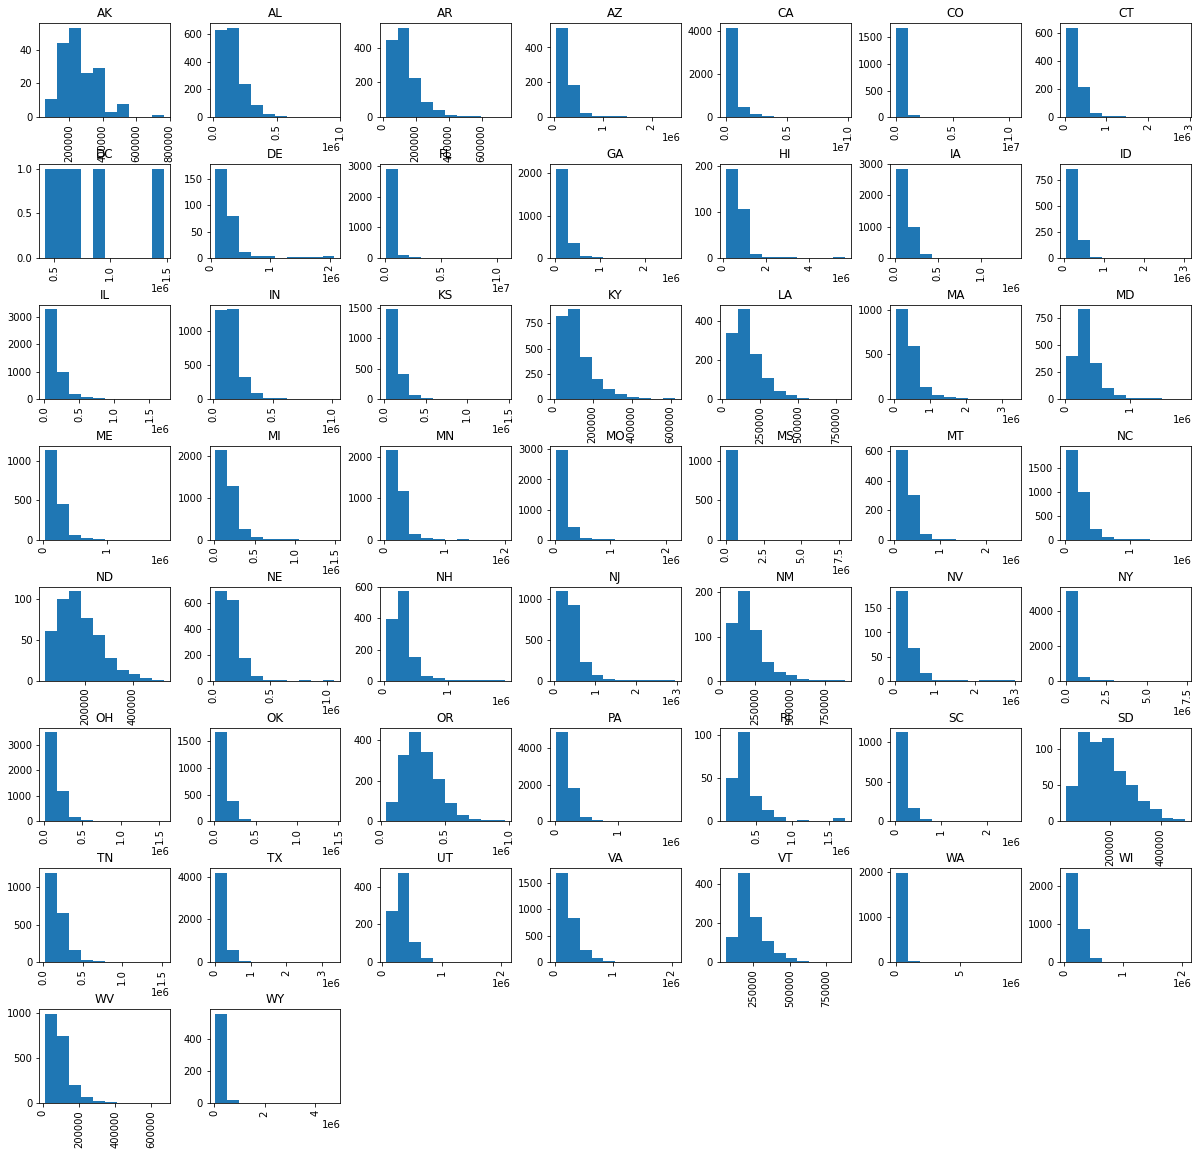

In [ ]:
import matplotlib.pyplot as plt
zi_total.Price.hist(by=zi_total.State, figsize=(20,20))
plt.plot()

# Alistamiento de datos para ML

Transformación de variables categoricas a numericas y estandarización de variables numericas.

Para la variable Metro se convirtió mediante el número de guiones que tuviera, los cuales separaban el número de áreas metropolitanas del cual estaba rodeada el área de la casa. 

Variables Categoricas Transformadas:


*   State
*   Metro

Variables Numéricas Estandarizadas:


*   Precio

Variables sin transformar



*   Rooms







In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
state_attribs = ["State"]
price_attribs = ["Price"]

full_pipeline = ColumnTransformer([
  ("stat", OrdinalEncoder(), state_attribs),
  ("price", StandardScaler(), price_attribs),
  ])
zi_total_prepared = full_pipeline.fit_transform(zi_total)

In [ ]:
def countGuiones(x):
  try:
    if len(x.split('-')) > 3:
      x = 4
    else:
      x = len(x.split('-'))
    return x
  except:
    return 0

zi_total['Metro_num'] = zi_total['Metro'].apply(lambda x: countGuiones(x))

In [ ]:
rooms = zi_total.Rooms.to_numpy()
metro = zi_total.Metro_num.to_numpy()

In [ ]:
rooms = rooms.reshape((len(rooms),1))
metro = metro.reshape((len(rooms),1))

In [ ]:
import numpy as np
zi_total_prepared = np.hstack([zi_total_prepared,rooms,metro])

In [ ]:
zi_total_df = pd.DataFrame(data = zi_total_prepared, columns = ["State","Price","Rooms","Metro"])
zi_total_df

,State,Price,Rooms,Metro
0,34.0,1.297434,1.0,3.0
1,4.0,1.132624,1.0,3.0
2,43.0,-0.468088,1.0,3.0
3,14.0,0.013155,1.0,3.0
4,43.0,-0.511625,1.0,2.0
...,...,...,...,...
106286,28.0,0.601022,5.0,1.0
106287,35.0,-0.544992,5.0,1.0
106288,49.0,0.271183,5.0,3.0
106289,12.0,-0.417981,5.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa17a9f40b8>,
      dtype=object)

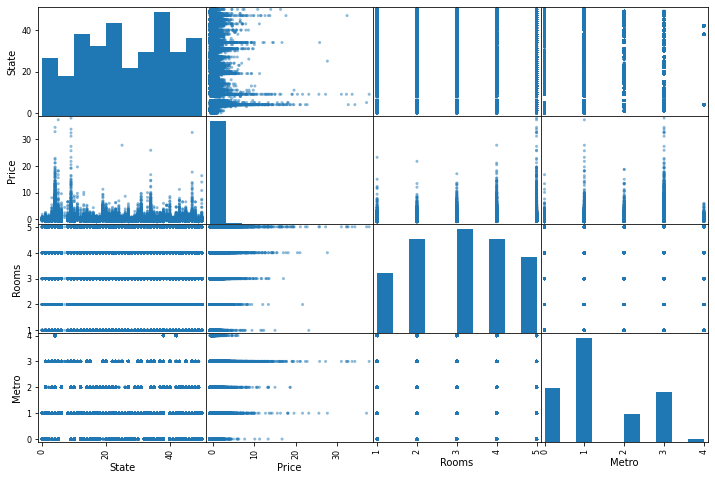

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(zi_total_df, figsize = (12,8))

# Aplicación Machine Learning

Con el fin de poder establecer el número de clusters para el método de K-Means, se aplicó el método de Mean Shift. Posteriormente se aplicó K-Means para realizar el ejercicio.

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(zi_total_prepared, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_fit = ms.fit(zi_total_prepared)

In [ ]:
clusters = ms_fit.predict(zi_total_prepared)

In [ ]:
clusters.max()

7

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=42).fit(zi_total_prepared)
mod_clus = kmeans.predict(zi_total_prepared)

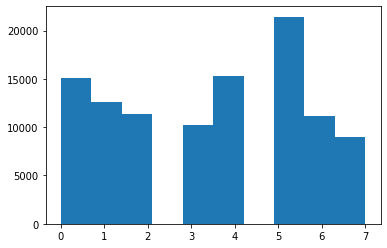

In [ ]:
plt.hist(mod_clus)
plt.show()

# Visualización de datos

Se hacen las gráficas para lograr entender el patrón dibujado por el método de K-Means.

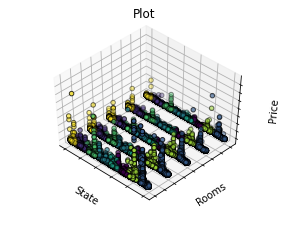

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(zi_total_prepared[:, 0], zi_total_prepared[:, 2], zi_total_prepared[:, 1],
             c=mod_clus.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('State')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.set_title("Plot")
ax.dist = 12

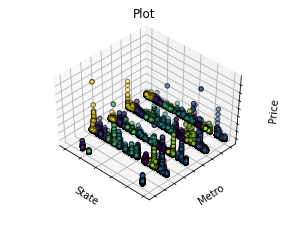

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(zi_total_prepared[:, 0], zi_total_prepared[:, 3], zi_total_prepared[:, 1],
             c=mod_clus.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('State')
ax.set_ylabel('Metro')
ax.set_zlabel('Price')
ax.set_title("Plot")
ax.dist = 12

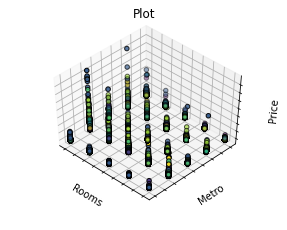

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(zi_total_prepared[:, 2], zi_total_prepared[:, 3], zi_total_prepared[:, 1],
             c=mod_clus.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Rooms')
ax.set_ylabel('Metro')
ax.set_zlabel('Price')
ax.set_title("Plot")
ax.dist = 12

#Análisis y Visualización de Clusters
Se analizan los datos que se agruparon de acuerdo a K-Means.

In [ ]:
zi_total_df["Cluster"] = mod_clus
zi_total_df

,State,Price,Rooms,Metro,Cluster
0,34.0,1.297434,1.0,3.0,5
1,4.0,1.132624,1.0,3.0,2
2,43.0,-0.468088,1.0,3.0,1
3,14.0,0.013155,1.0,3.0,0
4,43.0,-0.511625,1.0,2.0,1
...,...,...,...,...,...
106286,28.0,0.601022,5.0,1.0,3
106287,35.0,-0.544992,5.0,1.0,5
106288,49.0,0.271183,5.0,3.0,7
106289,12.0,-0.417981,5.0,0.0,6


In [ ]:
zi_zero = zi_total_df[zi_total_df["Cluster"]==0]
zi_zero

,State,Price,Rooms,Metro,Cluster
3,14.0,0.013155,1.0,3.0,0
13,15.0,-0.562893,1.0,3.0,0
19,17.0,-0.445668,1.0,1.0,0
26,19.0,1.246569,1.0,3.0,0
50,18.0,0.059539,1.0,2.0,0
...,...,...,...,...,...
106258,15.0,-0.464293,5.0,1.0,0
106267,14.0,-0.076189,5.0,1.0,0
106273,15.0,-0.464401,5.0,3.0,0
106274,14.0,-0.381333,5.0,1.0,0


In [ ]:
zi_one = zi_total_df[zi_total_df["Cluster"]==1]
zi_two = zi_total_df[zi_total_df["Cluster"]==2]
zi_three = zi_total_df[zi_total_df["Cluster"]==3]
zi_four = zi_total_df[zi_total_df["Cluster"]==4]
zi_five = zi_total_df[zi_total_df["Cluster"]==5]
zi_six = zi_total_df[zi_total_df["Cluster"]==6]
zi_seven = zi_total_df[zi_total_df["Cluster"]==7]

In [ ]:
zi_zero["Price"].describe()

count    15096.000000
mean        -0.200901
std          0.623601
min         -0.811369
25%         -0.550114
50%         -0.374334
75%         -0.077887
max         11.236197
Name: Price, dtype: float64

In [ ]:
zi_one["Price"].describe()

count    12579.000000
mean        -0.043304
std          0.633708
min         -0.784821
25%         -0.427198
50%         -0.196799
75%          0.153438
max         11.182394
Name: Price, dtype: float64

In [ ]:
zi_two["Price"].describe()

count    11416.000000
mean         0.662244
std          2.027956
min         -0.786875
25%         -0.284546
50%          0.144942
75%          0.833353
max         37.695212
Name: Price, dtype: float64

In [ ]:
zi_three["Price"].describe()

count    10209.000000
mean         0.089526
std          0.795824
min         -0.803817
25%         -0.368097
50%         -0.093433
75%          0.317581
max         27.612013
Name: Price, dtype: float64

In [ ]:
zi_four["Price"].describe()

count    15312.000000
mean        -0.134551
std          0.521914
min         -0.800245
25%         -0.460000
50%         -0.264073
75%          0.037255
max          6.913222
Name: Price, dtype: float64

In [ ]:
zi_five["Price"].describe()

count    21436.000000
mean        -0.130380
std          0.720352
min         -0.810583
25%         -0.489928
50%         -0.304993
75%         -0.005915
max         25.735466
Name: Price, dtype: float64

In [ ]:
zi_six["Price"].describe()

count    11207.000000
mean         0.004912
std          1.093029
min         -0.800389
25%         -0.477851
50%         -0.247930
75%          0.104719
max         19.550129
Name: Price, dtype: float64

In [ ]:
zi_seven["Price"].describe()

count    9036.000000
mean       -0.010692
std         0.874758
min        -0.800638
25%        -0.429558
50%        -0.173409
75%         0.195623
max        32.366648
Name: Price, dtype: float64

In [ ]:
zi_state = zi_total[['State']]
ordinal_encoder = OrdinalEncoder()
zi_state_encoded = ordinal_encoder.fit_transform(zi_state)

In [ ]:
array_stat = ordinal_encoder.inverse_transform(zi_total_df["State"].to_numpy().reshape(len(zi_total_df["State"]),1))

In [ ]:
array_stat

array([['NY'],
       ['CA'],
       ['TX'],
       ...,
       ['WV'],
       ['IA'],
       ['NY']], dtype=object)

In [ ]:
stat_np = np.hstack([array_stat,zi_total_df["Cluster"].to_numpy().reshape(len(zi_total_df["State"]),1)])

In [ ]:
stat_np

array([['NY', 5],
       ['CA', 2],
       ['TX', 1],
       ...,
       ['WV', 7],
       ['IA', 6],
       ['NY', 5]], dtype=object)

In [ ]:
state_df = pd.DataFrame(data = stat_np, columns = ["State","Cluster"])

In [ ]:
uniq_df = state_df.drop_duplicates(subset=['State'])
uniq_df.head()

,State,Cluster
0,NY,5
1,CA,2
2,TX,1
3,IL,0
5,PA,5


In [ ]:
uniq_np = uniq_df.to_numpy()

In [ ]:
import plotly.express as px
fig = px.choropleth(locations= uniq_np[:,0], locationmode="USA-states", color = uniq_np[:,1], scope = "usa")
fig.show()

# Guardar el modelo

In [ ]:
import pickle
filename = 'finalized_model_us_house_price.sav'
pickle.dump(kmeans, open(filename, 'wb'))